<h1>Error Codes</h1>

In classical devices, high energy particles (cosmic rays, neutrons produced in the earth’s atmosphere,
radiation from nuclear testind radiation from particle accelerator) can strike computers and cause bits to flip from $0$ to $1$ or from $1$ to $0$. Some bits may also become corrupted when transmitted through the internet.

Similarly, quantum devices face errors due to noise (thermal fluctuations, electromagnetic interference, stray atoms, etc.), decoherence, and more. In this demonstration, we illustrate the concept of quantum error detection.

1. [Quantum Error](#error)
2. [Quantum Error Detection](#detect)
3. [Qiskit Implementation](#qiskit)

IBM Quantum Composer: https://quantum.ibm.com/composer/

<a id="error"></a>
## 1. Quantum Error
We will begin with the $\ket{00}$ state. To simulate an simple bit flip error, we can simply apply an $X$ gate to the second qubit. In more complicated cases, the qubit may experience partial bit flips or phase flips.

<img src="images/bitflip.png"></img>

<a id="detect"></a>
## 2. Quantum Error Detection
Given that we know that the original error-free state, we can detect if any changes in the state had occurred with **parity checking**. **Parity** refers to whether the bit string has an even or odd number of $1$’s. If there is an even number of $1$'s, the output is $0$. If there is an odd number of $1$'s, the output is $1$.

In this case, our original state is $\ket{00}$. The **parity** of this state is $0$. 

To measure the parity without collapsing the original state, we add an **ancilla** qubit to store the parity. We apply $\text{CNOT}$ gates to the circuit for every qubit as the control and the **ancilla** qubit as the target.

<img src="images/error_codes.png"></img>

Measuring the **ancilla** qubit, we see the result to be $\ket{1}$. This differs from our original known parity, $0$. That means an error must have occurred.

<img src="images/error_codes_measurement.png"></img>

<a id="qiskit"></a>
## 3. Qiskit Implementation
We implement this in Qiskit.

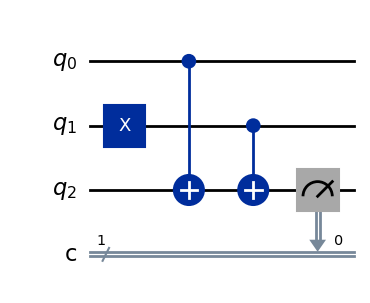

In [3]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 3 qubits and 1 classical bit for measurement
qc = QuantumCircuit(3, 1)

# Step 1: Showcase simple error
# Initialize the qubits in the |00⟩ state 

# Apply X gate to the second qubit to simulate a bit flip error
qc.x(1)  # Apply X gate to qubit 1 (second qubit)

# Step 2: Construct simple error detection (parity checking)
# Add parity checking using a third qubit (ancilla)

# Apply CNOT with qubit 0 (first qubit) as control and qubit 2 (third qubit) as target
qc.cx(0, 2)  

# Apply CNOT with qubit 1 (second qubit) as control and qubit 2 (third qubit) as target
qc.cx(1, 2)  

#Measure the ancilla qubit and store result in the classical bit
qc.measure(2, 0)  

# Visualize the circuit
qc.draw(output='mpl')

In [4]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(qc, shots=1000) # How many copies of the circuit are executed

# Get the result and count the occurrences of each outcome
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)

Measurement results: {'1': 1000}
